***Day 1 Agenda***

1. Understand the business requirement
2. Data wrangling 
3. Correlation analysis
4. Data Visualization

### Import libraries and read the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("marketing_data.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## **Column Details:**
1. **ID:** Customer's Unique Identifier
2. **Year_Birth:** Customer's Birth Year
3. **Education:** Customer's education level
4. **Marital_Status:** Customer's marital status
5. **Income:** Customer's yearly household income
6. **Kidhome:** Number of children in customer's household
7. **Teenhome:** Number of teenagers in customer's household
8. **Dt_Customer:** Date of customer's enrollment with the company
9. **Recency:** Number of days since customer's last purchase
10. **MntWines:** Amount spent on wine in the last 2 years
11. **MntFruits:** Amount spent on fruits in the last 2 years
12. **MntMeatProducts:** Amount spent on meat in the last 2 years
13. **MntFishProducts:** Amount spent on fish in the last 2 years
14. **MntSweetProducts:** Amount spent on sweets in the last 2 years
15. **MntGoldProds:** Amount spent on gold in the last 2 years
16. **NumDealsPurchases:** Number of purchases made with a discount
17. **NumWebPurchases:** Number of purchases made through the company's web site
18. **NumCatalogPurchases:** Number of purchases made using a catalogue
19. **NumStorePurchases:** Number of purchases made directly in stores
20. **NumWebVisitsMonth:** Number of visits to company's web site in the last month
21. **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)
22. **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)
23. **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)
24. **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)
25. **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)
26. **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise (Target variable)
27. **Complain:** 1 if customer complained in the last 2 years, 0 otherwise
28. **Country:** Customer's location


## **Data Wrangling**

In [4]:
df.shape

(2240, 28)

We have 2240 rows in the dataset. 

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [6]:
df.info()  #pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

1. We see that column_name "Income" has a space before it's name that will create problems in further analysis, so we'll rename it.

2. There looks a problem with 2 column's datatypes. 
We need to change the datatype of "**Income**" column into **int64** so that it can be used for further calculations, and change the datatype of "**Dt_Customer**" into datetime.

In [7]:
df.rename(columns={' Income ':'Income'},inplace=True)

In [8]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%m/%d/%y')  
df["Income"] = df["Income"].str.replace("$","").str.replace(",","") 
df["Income"] = df["Income"].astype(float)

In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [10]:
df.nunique() 

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

We have data of 2240 unique Customers. No customer ID is repeated in the data. 

### reomve IDs

In [11]:
df.drop(['ID'],axis=1,inplace =True)

### Check duplicates if any

In [12]:
duplicate = df[df.duplicated(subset=None,keep='first')] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate.shape 
#duplicate

Duplicate Rows :


(47, 27)

In [13]:
df= df.drop_duplicates() 

In [14]:
df.shape

(2193, 27)

no duplicates present in the data

### Handle missing values

In [15]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

We only have 24 missing values in the "**Income**" column.
So, we first check the skewness of the column.
If the data is symetrical, we use mean to impute the missing values, else we will use median.

To check the skewness, let us plot the boxplot and histogram. 

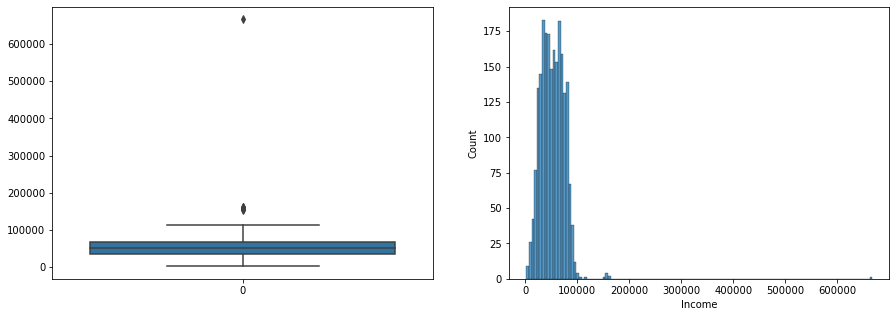

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = df["Income"])
plt.subplot(1,2,2)
sns.histplot(df["Income"])

We can see that the distribution is rightly skewed. It has a lot of outliers towards the right and so, mean will not be a good imputation method as mean is sensitive to outliers. 

In [17]:
df["Income"].fillna(value=df["Income"].median(),inplace=True)

### Divide the dataframe into 3 sub dataframes: categorical string, categorical numerical, Numerical

In [18]:
# split the dg --> two sub df 
# 1. categorial -- > Numerical
# 2. categorical -- > string -- > Chi Square test
# 2. Numerical ---> box plot, histogram, scatter

In [19]:
df_cat = df.loc[:,df.dtypes==np.object]

In [20]:
df_cat.head()

,Education,Marital_Status,Country
0,Graduation,Divorced,SP
1,Graduation,Single,CA
2,Graduation,Married,US
3,Graduation,Together,AUS
4,Graduation,Single,SP


In [21]:
df_cat.shape

(2193, 3)

In [22]:
cat_num = ['Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain']

df_cat_num = df[cat_num]




In [23]:
df_cat_num['Kidhome'].value_counts()

0    1266
1     880
2      47
Name: Kidhome, dtype: int64

In [24]:
df_cat['Marital_Status'].value_counts()

Married     845
Together    570
Single      471
Divorced    226
Widow        74
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [25]:
num = ['Year_Birth','Income','Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df_num = df[num]

In [26]:
df_num.head()

,Year_Birth,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1970,84835.0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1
1,1961,57091.0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5
2,1958,67267.0,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2
3,1967,32474.0,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7
4,1989,21474.0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7


## Analysis Numerical Continuous variable

In [27]:
df_num.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,1968.779754,52275.255814,49.125855,304.152303,26.211126,167.314181,37.437301,27.037848,44.181031,2.326037,4.095759,2.660283,5.784770,5.319197
std,11.995943,25103.175746,29.001237,336.584764,39.618627,226.628559,54.628505,41.246123,52.374568,1.928215,2.783545,2.923282,3.250099,2.424269
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35682.000000,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51411.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68274.000000,74.000000,505.000000,33.000000,230.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


## Univariate Analysis

### Outlier removal

Let us now check if there are any outliers present in the dataset. 

In [28]:
df_num = df_num.drop(['Dt_Customer'],axis=1)

In [29]:
df_num.columns


Index(['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [30]:
df_num.shape

(2193, 14)

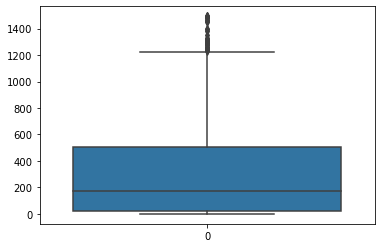

In [31]:
sns.boxplot(data = df_num['MntWines'])

#### No need to remove as amount as can be increased to any level

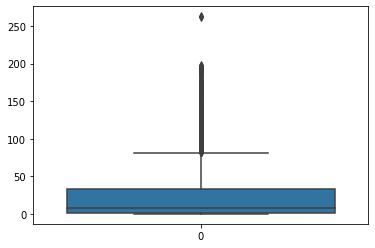

In [32]:
sns.boxplot(data = df_num['MntSweetProducts'])

#### No need to remove as amount as can be increased to any level

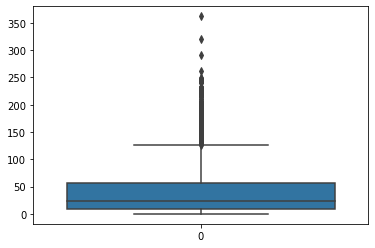

In [33]:
sns.boxplot(data = df_num['MntGoldProds'])

#### No need to remove as amount as can be increased to any level

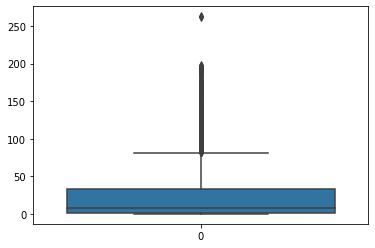

In [34]:
sns.boxplot(data = df_num['MntSweetProducts'])

#### No need to remove as amount as can be increased to any level

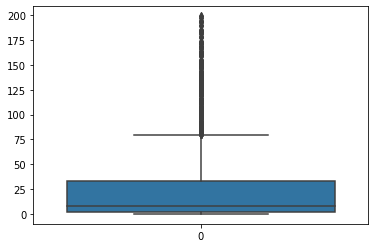

In [35]:
sns.boxplot(data = df_num['MntFruits'])

#### No need to remove as amount as can be increased to any level

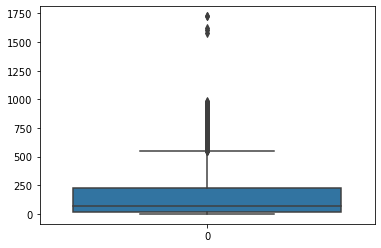

In [36]:
sns.boxplot(data = df_num['MntMeatProducts'])

#### No need to remove as amount as can be increased to any level

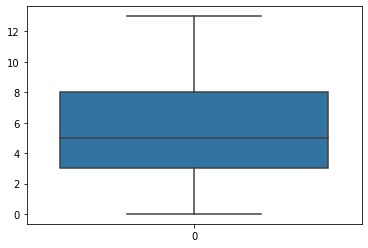

In [37]:
sns.boxplot(data = df_num['NumStorePurchases'])

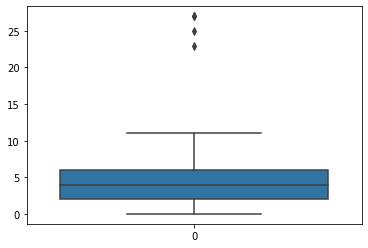

In [38]:
sns.boxplot(data = df_num['NumWebPurchases'])

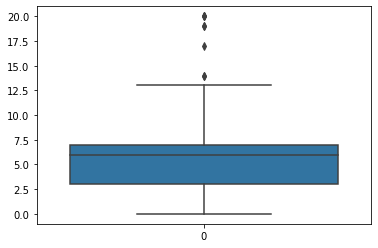

In [39]:
sns.boxplot(data = df_num['NumWebVisitsMonth'])

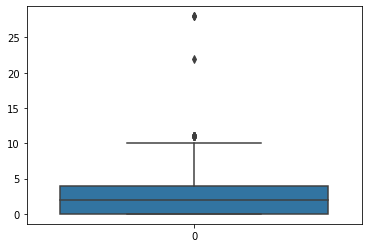

In [40]:
sns.boxplot(data = df_num['NumCatalogPurchases'])

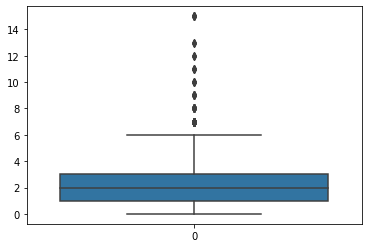

In [41]:
sns.boxplot(data = df_num['NumDealsPurchases'])

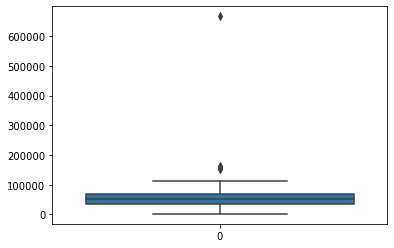

In [42]:
sns.boxplot(data = df_num['Income'])

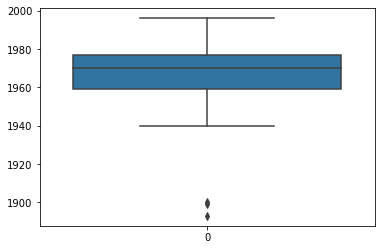

In [43]:
sns.boxplot(data = df_num['Year_Birth'])

#### We need to remove it as it's not possible for a customer to have birth year less than 1900

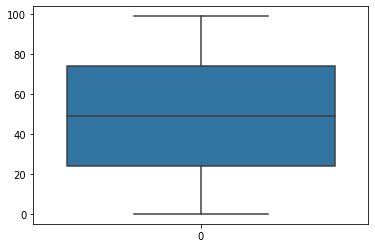

In [44]:
sns.boxplot(data = df_num['Recency'])

In [45]:
Q1 = df_num['Year_Birth'].quantile(0.25)
Q3 = df_num['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
print(Q1 )
print(Q3 )

1959.0
1977.0


In [46]:
df_num.shape

(2193, 14)

In [47]:
df_num = df_num[~((df_num['Year_Birth'] < (Q1 - 1.5 * IQR)) |(df_num['Year_Birth'] > (Q3 + 1.5 * IQR)))]

In [48]:
df_num.shape

(2190, 14)

In [49]:
df_num['Year_Birth'].shape

(2190,)